https://www.dataquest.io/blog/pandas-pivot-table/

In [1]:
import pandas as pd
import numpy as np

data=pd.read_excel('http://www.elisanet.fi/taanila/happy.xlsx')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015
3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,2015
4,Argentina,Latin America and Caribbean,30.0,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,2015


In [2]:
#pivot-taulukko, jonka riveillä (index) vuodet ja arvoina onnellisuuspistemäärien keskiarvot
pd.pivot_table(data, index= 'Year', values= "Happiness Score")

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


In [3]:
pd.pivot_table(data, index = 'Region', values="Happiness Score")

,Happiness Score
Region,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


In [4]:
#Riveille voi ottaa useampiakin muuttujia
pd.pivot_table(data, index = ['Region', 'Year'], values="Happiness Score")

Happiness Score
Region                          Year                 
Australia and New Zealand       2015         7.285000
                                2016         7.323500
                                2017         7.299000
Central and Eastern Europe      2015         5.332931
                                2016         5.370690
                                2017         5.409931
Eastern Asia                    2015         5.626167
                                2016         5.624167
                                2017         5.646667
Latin America and Caribbean     2015         6.144682
                                2016         6.101750
                                2017         5.957818
Middle East and Northern Africa 2015         5.406900
                                2016         5.386053
                                2017         5.369684
North America                   2015         7.273000
                                2016         7.254000
                                2017         7.154500
Southeastern Asia               2015         5.317444
                                2016         5.338889
                                2017         5.444875
Southern Asia                   2015         4.580857
                                2016         4.563286
                                2017         4.628429
Sub-Saharan Africa              2015         4.202800
                                2016         4.136421
                                2017         4.111949
Western Europe                  2015         6.689619
                                2016         6.685667
                                2017         6.703714

In [5]:
#Sarakkeissa (columns) vuodet
pd.pivot_table(data, index= 'Region', columns='Year', values="Happiness Score")

Year,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.646667
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


In [6]:
#aggfunc määrittää laskettavat tunnusluvut
pd.pivot_table(data, index= 'Region', values= "Happiness Score", aggfunc= [np.mean, np.median, min, max, np.std])

,mean,median,min,max,std
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.2995,7.284,7.334,0.020936
Central and Eastern Europe,5.371184,5.4010,4.096,6.609,0.578274
Eastern Asia,5.632333,5.6545,4.874,6.422,0.502100
Latin America and Caribbean,6.069074,6.1265,3.603,7.226,0.728157
Middle East and Northern Africa,5.387879,5.3175,3.006,7.278,1.031656
North America,7.227167,7.2175,6.993,7.427,0.179331
Southeastern Asia,5.364077,5.2965,3.819,6.798,0.882637
Southern Asia,4.590857,4.6080,3.360,5.269,0.535978


In [7]:
#Python-funktio (def), joka palauttaa ala- ja yläneljänneksen välisten arvojen keskiarvon
def remove_outliers(values):
    mid_quantiles = values.quantile([.25, .75])
    return np.mean(mid_quantiles)

#aggfunc sallii myös itse määriteltyjen funktioiden (def) käytön
pd.pivot_table(data, index = 'Region', values="Happiness Score",
               aggfunc= [np.mean, remove_outliers])

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Australia and New Zealand,7.302500,7.299125
Central and Eastern Europe,5.371184,5.449250
Eastern Asia,5.632333,5.610125
Latin America and Caribbean,6.069074,6.192750
Middle East and Northern Africa,5.387879,5.508500
North America,7.227167,7.244875
Southeastern Asia,5.364077,5.470125
Southern Asia,4.590857,4.707500


In [8]:
table1 = pd.pivot_table(data, index = 'Region', values="Happiness Score", aggfunc= [np.mean, remove_outliers])
#Rajoitutaan vain alueisiin, joiden nimessä esiintyy 'Asia'
table1[table1.index.str.contains('Asia')]

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Eastern Asia,5.632333,5.610125
Southeastern Asia,5.364077,5.470125
Southern Asia,4.590857,4.707500


In [9]:
#Rajoitutaan vain alueisiin, joiden nimessä esiintyy 'Europe'
table1[table1.index.str.contains('Europe')]

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Central and Eastern Europe,5.371184,5.44925
Western Europe,6.693000,6.84650


In [10]:
table2 = pd.pivot_table(data, index = ['Region', 'Year'], values='Happiness Score',
               aggfunc= [np.mean, remove_outliers])
#Kohdistetaan kysely (query) taulukkoon 'table2'
table2.query('Year == [2015, 2017] and Region == ["Sub-Saharan Africa", "Middle East and Northern Africa"]')

mean remove_outliers
                                     Happiness Score Happiness Score
Region                          Year                                
Middle East and Northern Africa 2015        5.406900        5.515875
                                2017        5.369684        5.425500
Sub-Saharan Africa              2015        4.202800        4.168375
                                2017        4.111949        4.118000

In [11]:
#Jaetaan onnellisuuspisteet neljänneksiin
score1 = pd.qcut(data["Happiness Score"], 4)
pd.pivot_table(data, index= ['Region', score1], values= "Happiness Score", aggfunc= 'count')

Happiness Score
Region                          Happiness Score                 
Australia and New Zealand       (2.692, 4.509]               NaN
                                (4.509, 5.282]               NaN
                                (5.282, 6.234]               NaN
                                (6.234, 7.587]               6.0
Central and Eastern Europe      (2.692, 4.509]              10.0
                                (4.509, 5.282]              28.0
                                (5.282, 6.234]              46.0
                                (6.234, 7.587]               3.0
Eastern Asia                    (2.692, 4.509]               NaN
                                (4.509, 5.282]               6.0
                                (5.282, 6.234]               9.0
                                (6.234, 7.587]               3.0
Latin America and Caribbean     (2.692, 4.509]               2.0
                                (4.509, 5.282]               8.0
                                (5.282, 6.234]              28.0
                                (6.234, 7.587]              30.0
Middle East and Northern Africa (2.692, 4.509]               9.0
                                (4.509, 5.282]              19.0
                                (5.282, 6.234]              14.0
                                (6.234, 7.587]              16.0
North America                   (2.692, 4.509]               NaN
                                (4.509, 5.282]               NaN
                                (5.282, 6.234]               NaN
                                (6.234, 7.587]               6.0
Southeastern Asia               (2.692, 4.509]               5.0
                                (4.509, 5.282]               8.0
                                (5.282, 6.234]               7.0
                                (6.234, 7.587]               6.0
Southern Asia                   (2.692, 4.509]               8.0
                                (4.509, 5.282]              13.0
                                (5.282, 6.234]               NaN
                                (6.234, 7.587]               NaN
Sub-Saharan Africa              (2.692, 4.509]              84.0
                                (4.509, 5.282]              29.0
                                (5.282, 6.234]               4.0
                                (6.234, 7.587]               NaN
Western Europe                  (2.692, 4.509]               NaN
                                (4.509, 5.282]               6.0
                                (5.282, 6.234]               9.0
                                (6.234, 7.587]              48.0

In [12]:
#Jaetaan onnellisuuspisteet kolmanneksiin
score2 = pd.qcut(data["Happiness Score"], 3)
#Korvataan NaN-arvot nollilla
pd.pivot_table(data, index= ['Region', score2], values= "Happiness Score", aggfunc= 'count', fill_value= 0)

Happiness Score
Region                          Happiness Score                 
Australia and New Zealand       (2.692, 4.79]                  0
                                (4.79, 5.895]                  0
                                (5.895, 7.587]                 6
Central and Eastern Europe      (2.692, 4.79]                 15
                                (4.79, 5.895]                 58
                                (5.895, 7.587]                14
Eastern Asia                    (2.692, 4.79]                  0
                                (4.79, 5.895]                 11
                                (5.895, 7.587]                 7
Latin America and Caribbean     (2.692, 4.79]                  4
                                (4.79, 5.895]                 19
                                (5.895, 7.587]                45
Middle East and Northern Africa (2.692, 4.79]                 18
                                (4.79, 5.895]                 20
                                (5.895, 7.587]                20
North America                   (2.692, 4.79]                  0
                                (4.79, 5.895]                  0
                                (5.895, 7.587]                 6
Southeastern Asia               (2.692, 4.79]                  6
                                (4.79, 5.895]                 12
                                (5.895, 7.587]                 8
Southern Asia                   (2.692, 4.79]                 13
                                (4.79, 5.895]                  8
                                (5.895, 7.587]                 0
Sub-Saharan Africa              (2.692, 4.79]                101
                                (4.79, 5.895]                 16
                                (5.895, 7.587]                 0
Western Europe                  (2.692, 4.79]                  0
                                (4.79, 5.895]                 12
                                (5.895, 7.587]                51

In [13]:
#Lasketaan myös kokonaismäärä (margins)
pd.pivot_table(data, index= ['Region', score2], values= "Happiness Score", aggfunc= 'count', fill_value= 0,
              margins = True, margins_name= 'Total count')

Happiness Score
Region                          Happiness Score                 
Australia and New Zealand       (2.692, 4.79]                  0
                                (4.79, 5.895]                  0
                                (5.895, 7.587]                 6
Central and Eastern Europe      (2.692, 4.79]                 15
                                (4.79, 5.895]                 58
                                (5.895, 7.587]                14
Eastern Asia                    (2.692, 4.79]                  0
                                (4.79, 5.895]                 11
                                (5.895, 7.587]                 7
Latin America and Caribbean     (2.692, 4.79]                  4
                                (4.79, 5.895]                 19
                                (5.895, 7.587]                45
Middle East and Northern Africa (2.692, 4.79]                 18
                                (4.79, 5.895]                 20
                                (5.895, 7.587]                20
North America                   (2.692, 4.79]                  0
                                (4.79, 5.895]                  0
                                (5.895, 7.587]                 6
Southeastern Asia               (2.692, 4.79]                  6
                                (4.79, 5.895]                 12
                                (5.895, 7.587]                 8
Southern Asia                   (2.692, 4.79]                 13
                                (4.79, 5.895]                  8
                                (5.895, 7.587]                 0
Sub-Saharan Africa              (2.692, 4.79]                101
                                (4.79, 5.895]                 16
                                (5.895, 7.587]                 0
Western Europe                  (2.692, 4.79]                  0
                                (4.79, 5.895]                 12
                                (5.895, 7.587]                51
Total count                                                  470

Text(0,0.5,'Happiness Rank')

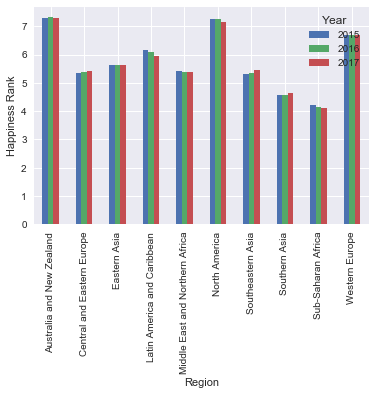

In [14]:
#Kirjastoja ja asetuksia grafiikkaa varten
%matplotlib inline
import matplotlib.pyplot as plt #Peruskirjasto grafiikkaan
import seaborn as sns #Erikoiskirjasto grafiikkaan
sns.set()  

#Kuvataan pivot-taulukko pylväinä
pd.pivot_table(data, index= 'Region', columns= 'Year', values= "Happiness Score").plot(kind= 'bar')
plt.ylabel("Happiness Rank")

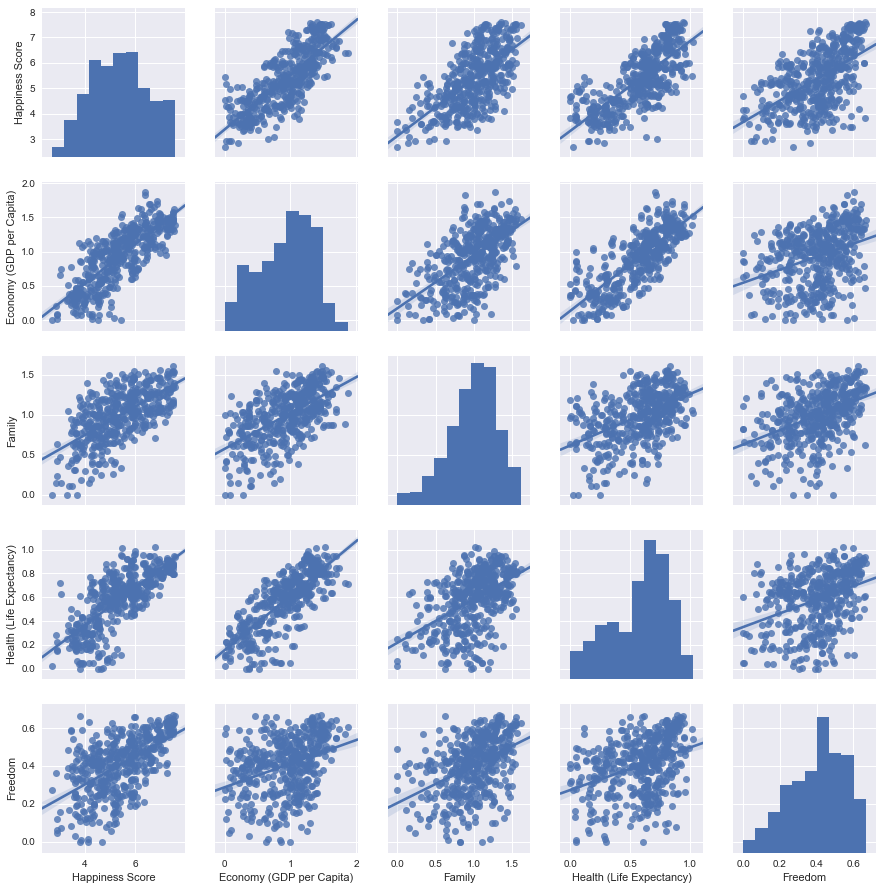

In [15]:
#Seaborn-kirjaston 'pairplot' on tehokas tapa tutkia määrällisten muuttujien riippuvuuksia
#Seabornin kuviot edellyttävät, että puuttuvia arvoja sisältävät rivit jätetään pois (dropna())
sns.pairplot(data.dropna()[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom']], kind='reg')

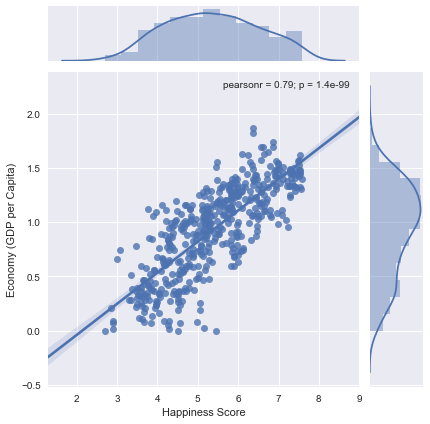

In [16]:
#Seaborn-kirjaston 'jointplot' esittää hajontakaavion reunoilla muuttujien jakaumat histogrammeina
sns.jointplot(x='Happiness Score', y='Economy (GDP per Capita)', data=data.dropna(), kind='reg')

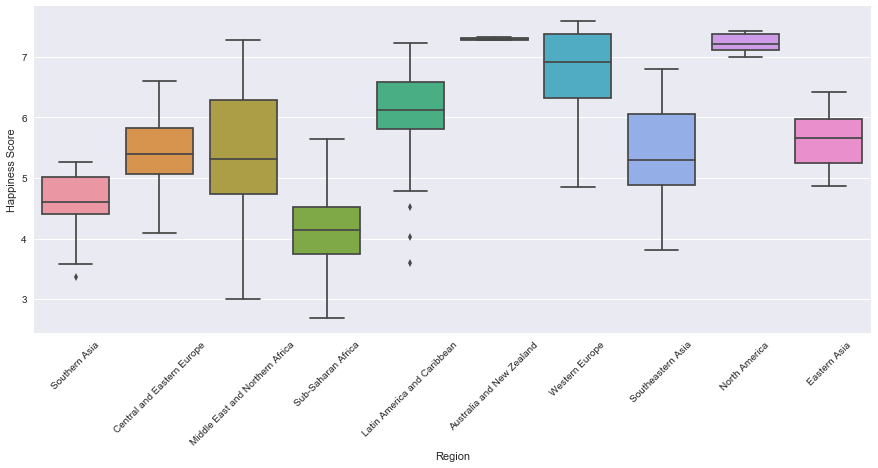

In [21]:
#Grafiikan asetusten säätäminen vaatii oman opettelunsa sekä 'figure' ja 'axes' -objektien ymmärrystä
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.xticks(rotation=45)
#Seaborn-kirjaston boxplot esittää viiden luvun yhteenvetoja
sns.boxplot(x='Region', y='Happiness Score', data=data.dropna())

In [18]:
#Kaikkien määrällisten muuttujien tunnusluvut
data.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,495.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717,2016.000000
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772,0.817323
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975,2015.000000
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640,2016.000000
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575,2017.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2017.000000


In [19]:
#Määrällisten muuttujien väliset korrelaatiot
data.corr()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
Happiness Rank,1.000000,-0.993268,-0.790551,-0.637627,-0.750146,-0.547627,-0.384371,-0.146162,-0.482706,-0.013460
Happiness Score,-0.993268,1.000000,0.785450,0.636532,0.748040,0.560353,0.406340,0.163562,0.489747,-0.007761
Economy (GDP per Capita),-0.790551,0.785450,1.000000,0.585449,0.792224,0.344962,0.301935,-0.014173,0.030087,0.136445
Family,-0.637627,0.636532,0.585449,1.000000,0.486383,0.425377,0.158605,0.071775,-0.081537,0.251134
Health (Life Expectancy),-0.750146,0.748040,0.792224,0.486383,1.000000,0.359566,0.262932,0.077326,0.057674,-0.134582
Freedom,-0.547627,0.560353,0.344962,0.425377,0.359566,1.000000,0.490405,0.343389,0.038422,-0.054697
Trust (Government Corruption),-0.384371,0.406340,0.301935,0.158605,0.262932,0.490405,1.000000,0.287414,0.000001,-0.074393
Generosity,-0.146162,0.163562,-0.014173,0.071775,0.077326,0.343389,0.287414,1.000000,-0.114468,0.029782
Dystopia Residual,-0.482706,0.489747,0.030087,-0.081537,0.057674,0.038422,0.000001,-0.114468,1.000000,-0.177951
Year,-0.013460,-0.007761,0.136445,0.251134,-0.134582,-0.054697,-0.074393,0.029782,-0.177951,1.000000
